# Social Network Analysis
## Who are the global influencers?
## Who are influencers of local communities?

In [51]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 12]
%matplotlib inline

In [149]:
G = nx.karate_club_graph()
print(nx.info(G))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


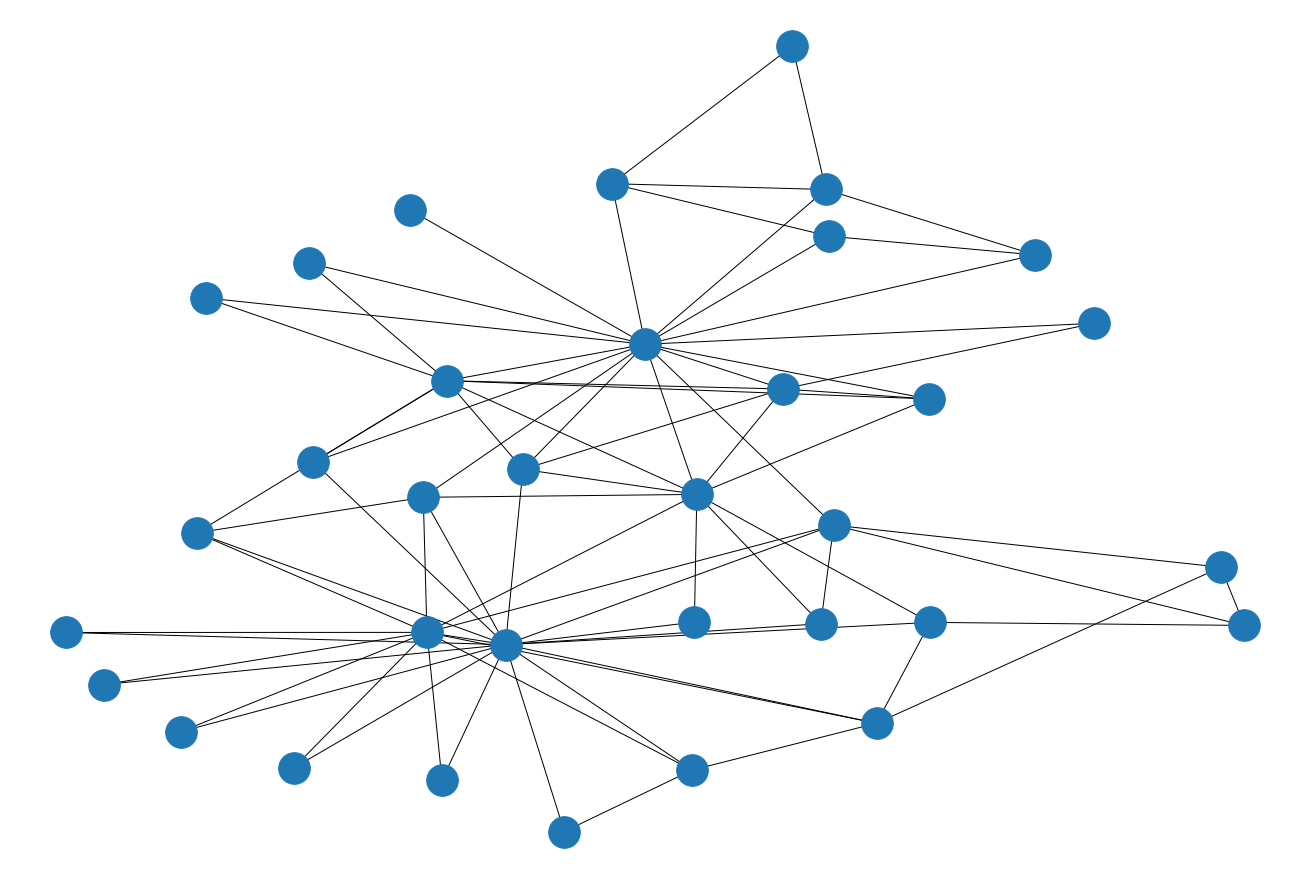

In [150]:
# drawing with a particular layout algorithm
nx.draw_kamada_kawai(G, node_size = 1000)

In [151]:
degrees = [d[1] for d in G.degree]
degrees

[16,
 9,
 10,
 6,
 3,
 4,
 4,
 4,
 5,
 2,
 3,
 1,
 2,
 5,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 5,
 3,
 3,
 2,
 4,
 3,
 4,
 4,
 6,
 12,
 17]

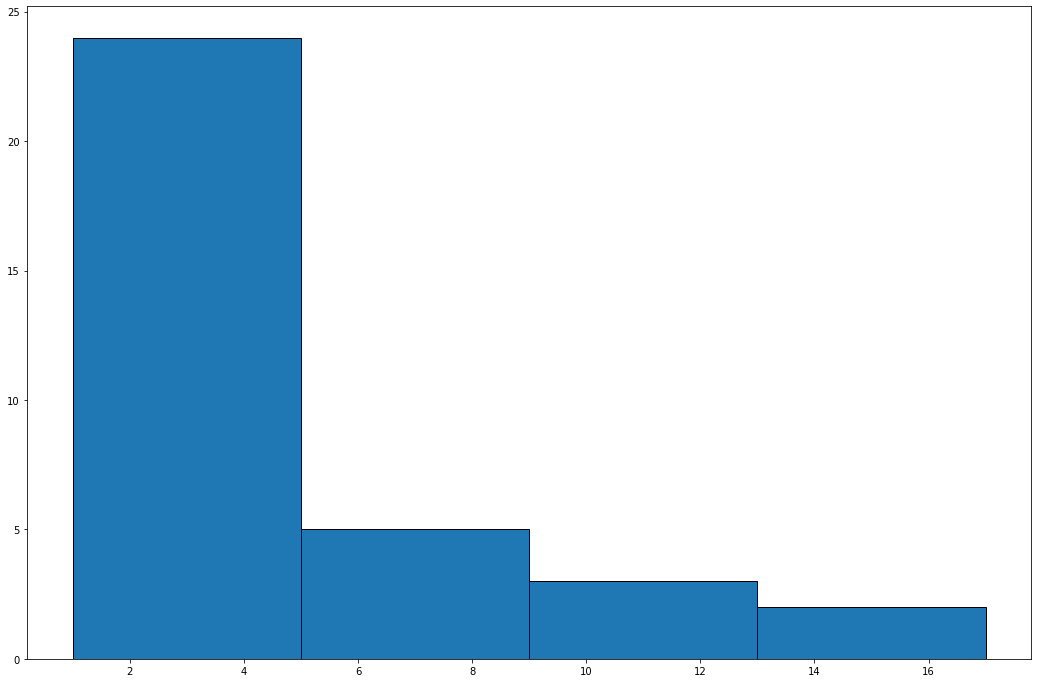

In [152]:
h = plt.hist(degrees, edgecolor='k', bins=4)

In [106]:
centrality = nx.betweenness_centrality(G)
centrality

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

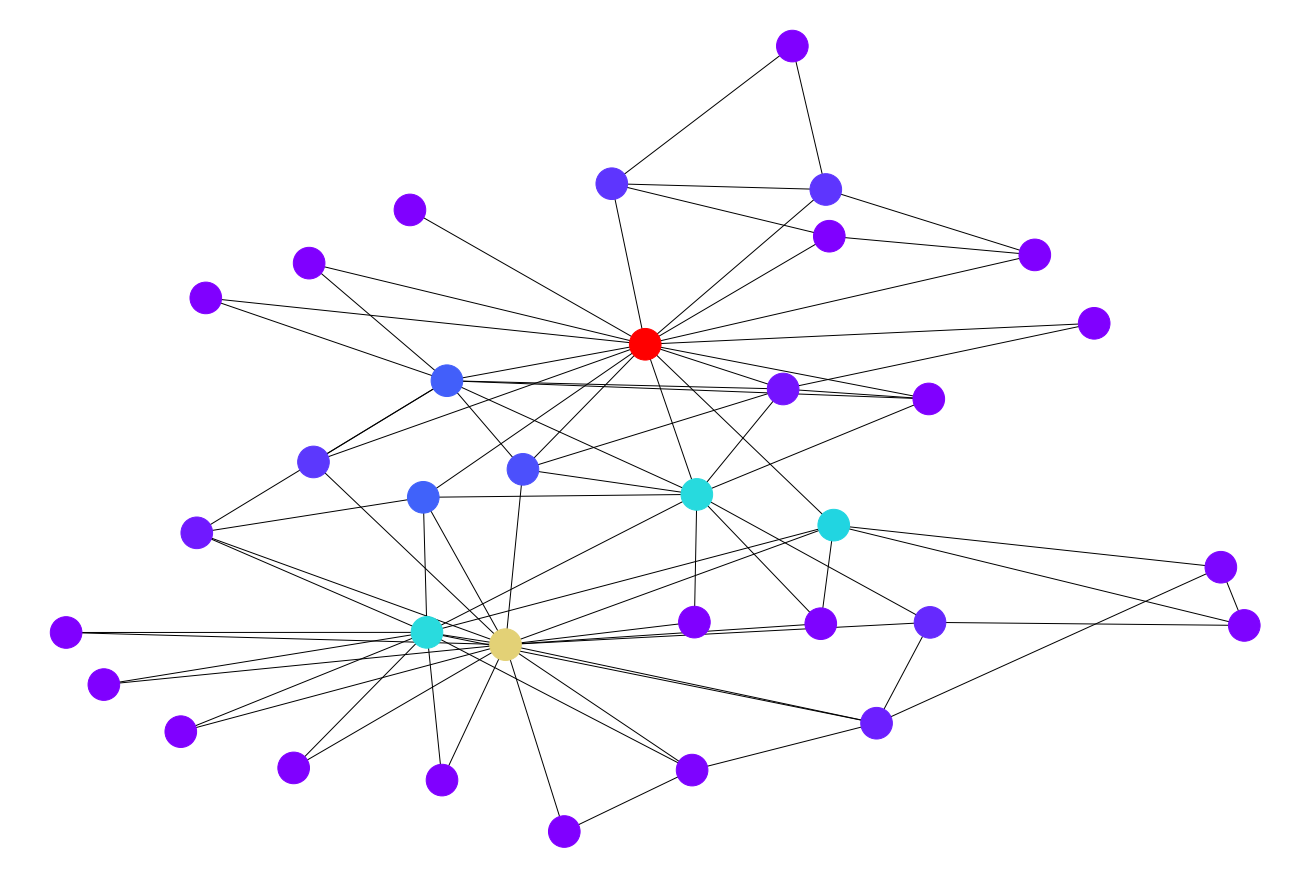

In [109]:
maxCentrality = max(centrality.values())
node_colors = [int(255*val/maxCentrality) for val in centrality.values()]
nx.draw_kamada_kawai(G, cmap = plt.get_cmap("rainbow"), node_color = node_colors, node_size = 1000, with_labels = False)

In [130]:
from networkx.algorithms import community
partition = community.greedy_modularity_communities(G)
partition

[frozenset({8,
            14,
            15,
            18,
            20,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33}),
 frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}),
 frozenset({0, 4, 5, 6, 10, 11, 16, 19})]

In [131]:
## convert to a dictionary
partDict = {}
for partIdx, part in enumerate(partition):
    for node in part:
        partDict[node] =  partIdx
cols = [partDict[node] for node in G.nodes()]

In [132]:
partDict

{32: 0,
 33: 0,
 8: 0,
 14: 0,
 15: 0,
 18: 0,
 20: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 1: 1,
 2: 1,
 3: 1,
 7: 1,
 9: 1,
 12: 1,
 13: 1,
 17: 1,
 21: 1,
 0: 2,
 4: 2,
 5: 2,
 6: 2,
 10: 2,
 11: 2,
 16: 2,
 19: 2}

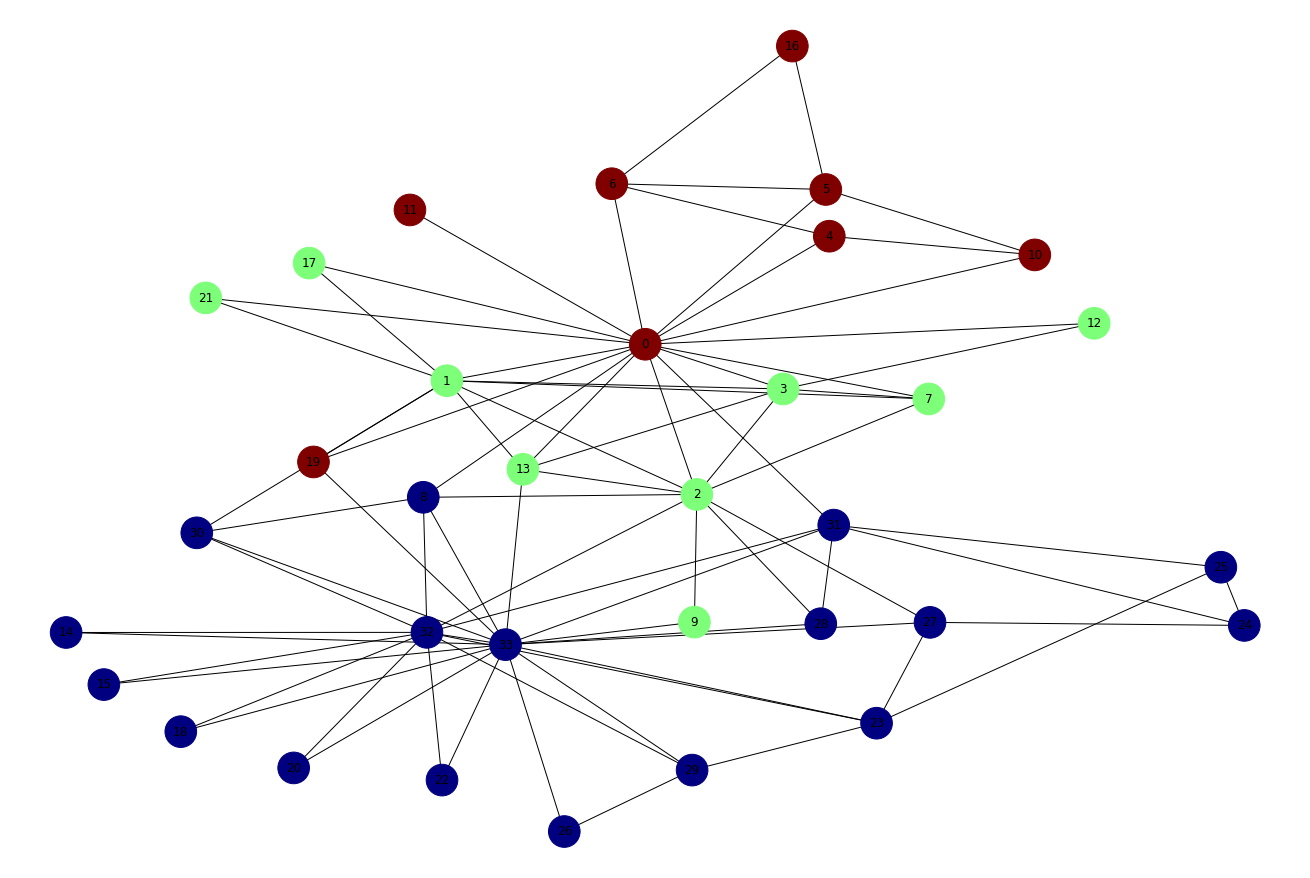

In [133]:
nx.draw_kamada_kawai(G, cmap = plt.get_cmap("jet"), node_color = cols, node_size = 1000, with_labels = True)

## Facebook graph
More realistically, we now look at a larger (but still small in comparison to real networks) graph.

In [53]:
G_fb = nx.read_edgelist("Data/facebook_combined.txt", create_using = nx.Graph(), nodetype = int)

In [54]:
#Quick snapshot of the Network
print (nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


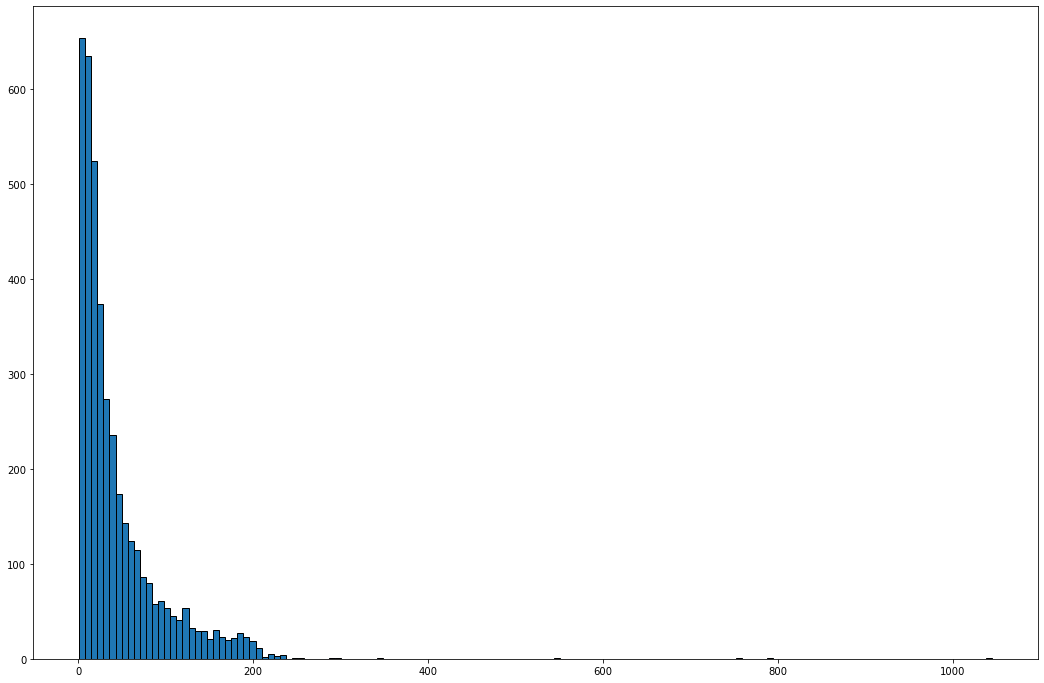

In [97]:
h = plt.hist([d[1] for d in G_fb.degree], edgecolor='k', bins=150)

In [55]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G_fb)

In [57]:
plt.rcParams['figure.figsize'] = [18,12]

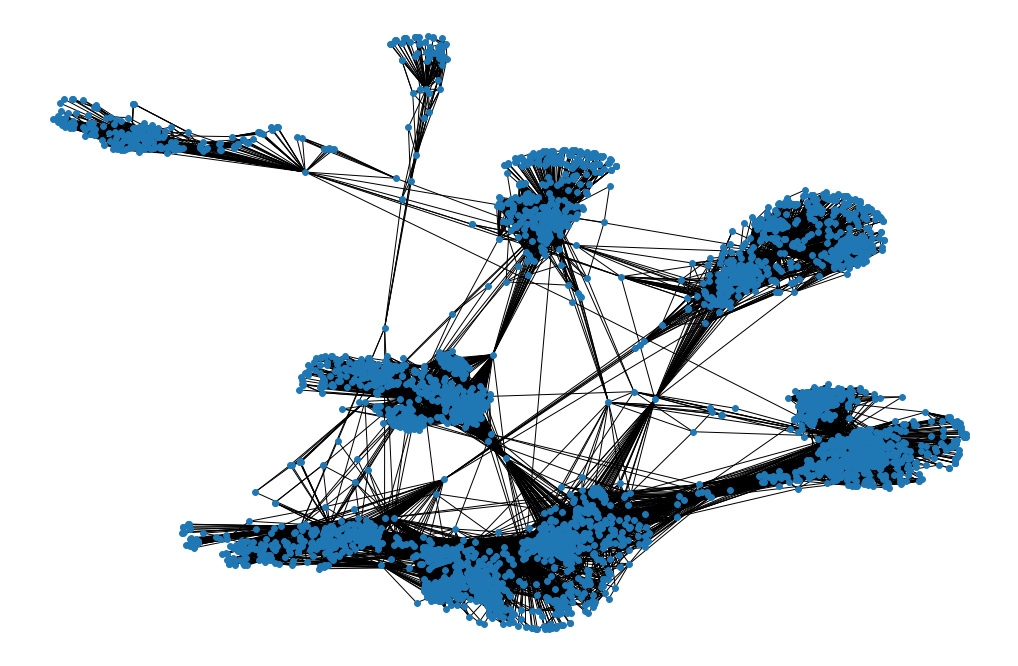

In [67]:
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, with_labels=False, node_size = 35)

# Betweenness Centrality

In [111]:
centrality = nx.betweenness_centrality(G_fb)

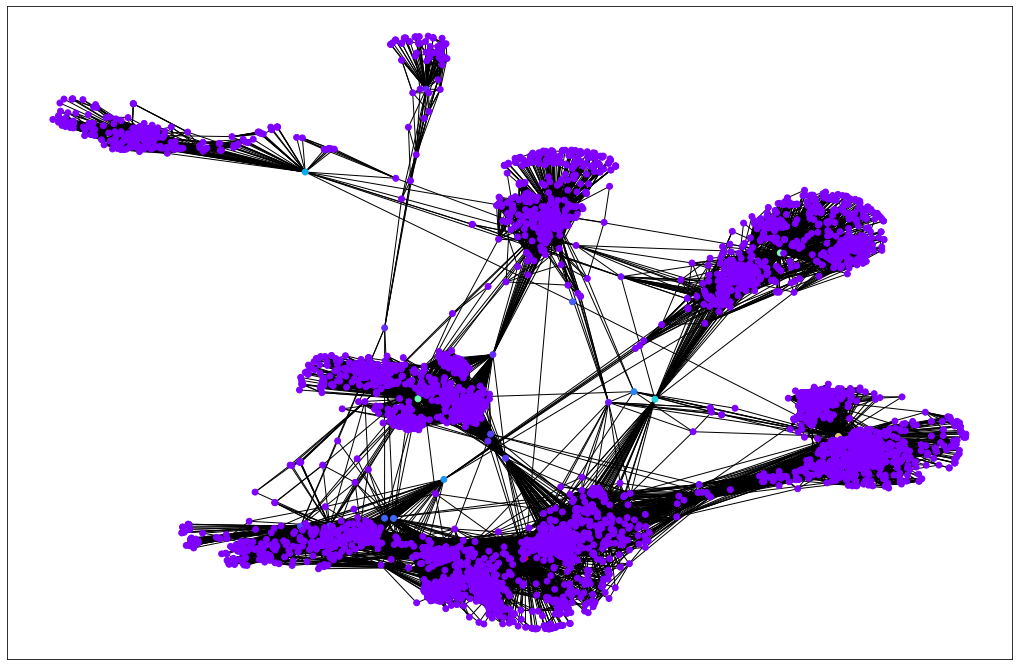

In [112]:
maxCentrality = max(centrality.values())
node_colors = [int(255*val/maxCentrality) for val in centrality.values()]
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = node_colors, node_size = 35, with_labels = False)

# Community Detection

In [ ]:
from networkx.algorithms import community
partition = community.greedy_modularity_communities(G_fb)

In [147]:
print("Found {len(partition)} communities")
print([len(part) for part in partition])

Found {len(partition)} communities
[983, 815, 548, 543, 372, 219, 208, 206, 59, 37, 25, 18, 6]


In [139]:
## convert to a dictionary
partDict = {}
for partIdx, part in enumerate(partition):
    for node in part:
        partDict[node] =  partIdx
cols = [partDict[node] for node in G_fb.nodes()]

In [140]:
cols

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


### Mathematical Definition betweenness centrality
betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)

Compute the shortest-path betweenness centrality for nodes.
    
Betweenness centrality of a node $v$ is the sum of the
fraction of all-pairs shortest paths that pass through $v$

$$c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$$
    
where $V$ is the set of nodes, $\sigma(s, t)$ is the number of
shortest $(s, t)$-paths,  and $\sigma(s, t|v)$ is the number of
those paths passing through some node $v$ other than $s, t$.
If $s = t$, $\sigma(s, t) = 1$, and if $v \in {s, t}$,
$\sigma(s, t|v) = 0$.

In [153]:
help(nx.betweenness_centrality)

Help on function betweenness_centrality in module networkx.algorithms.centrality.betweenness:

betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)
    Compute the shortest-path betweenness centrality for nodes.
    
    Betweenness centrality of a node $v$ is the sum of the
    fraction of all-pairs shortest paths that pass through $v$
    
    .. math::
    
       c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}
    
    where $V$ is the set of nodes, $\sigma(s, t)$ is the number of
    shortest $(s, t)$-paths,  and $\sigma(s, t|v)$ is the number of
    those paths  passing through some  node $v$ other than $s, t$.
    If $s = t$, $\sigma(s, t) = 1$, and if $v \in {s, t}$,
    $\sigma(s, t|v) = 0$ [2]_.
    
    Parameters
    ----------
    G : graph
      A NetworkX graph.
    
    k : int, optional (default=None)
      If k is not None use k node samples to estimate betweenness.
      The value of k <= n where n is the number of 

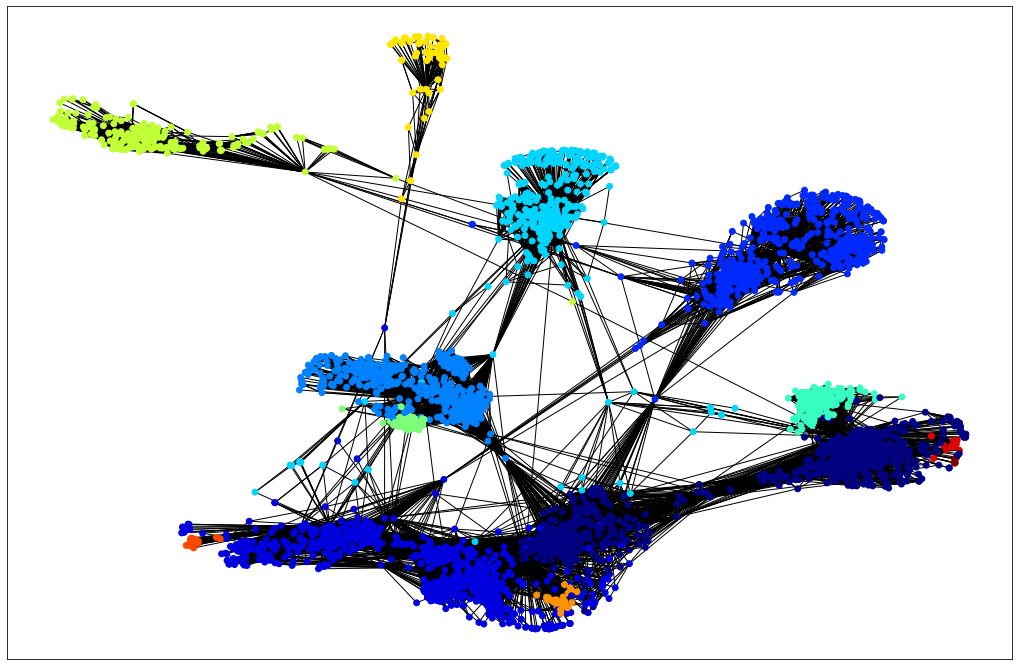

In [148]:
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = cols, node_size = 35, with_labels = False)